## Deep Learnign Foundations to Stable Diffusion

This is the *first* lesson of part 2.  
Note that the video lesson was made on 10/2022 so Jeremy warns that things are moving quickly. However he says that  *after* this lesson, we will be focusing on foundations and those are not changing.  This will enable you to keep up with the changes in the field yourself.

###  Compute 
This course requires is demanding on compute.   Video said to check the course web site, [Course.fast.ai](https://course.fast.ai/Lessons/lesson9.html) .  I intend to use Paperspace since I already have an account there and they support remote kernals. 

### Useful links

[diffusion-nbs](https://github.com/fastai/diffusion-nbs)   contains some notebooks to play stable diffusion

[lexica](https://lexica.art) is a cool resource for help with prompts. Search for images, and see what prompts are used to generate them.



### Stable diffusion with Diffusrs 

This part of the video goes through the example from diffusion-nbs `stable_diffusion.ipynb` . I ran these using the remote paperspace kernal.  Note that in paperspace I first have to set up the machine using the setup notebook I made there.

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from diffusers import StableDiffusionPipeline
from fastcore.all import concat
#from huggingface_hub import notebook_login
from PIL import Image

logging.disable(logging.WARNING)

torch.manual_seed(1)
#if not (Path.home()/'.cache/huggingface'/'token').exists(): notebook_login()

2024-09-02 20:39:25.570121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 20:39:25.570192: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 20:39:25.571656: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 20:39:25.580979: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 20:39:26.796907: W tensorflow/compiler/tf2

In [2]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4",
                                                variant="fp16", torch_dtype=torch.float16).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Note that Jeremy said his took only 30s, these are takign 2 minutes on my paperspace machine.  I am using the free p5000 machine.  

  0%|          | 0/50 [00:00<?, ?it/s]

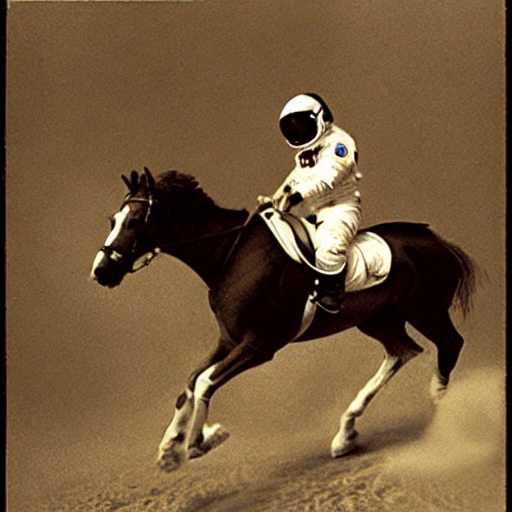

In [3]:
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

Note this is completely reproducable since I set the seed above. Wild. 

  0%|          | 0/50 [00:00<?, ?it/s]

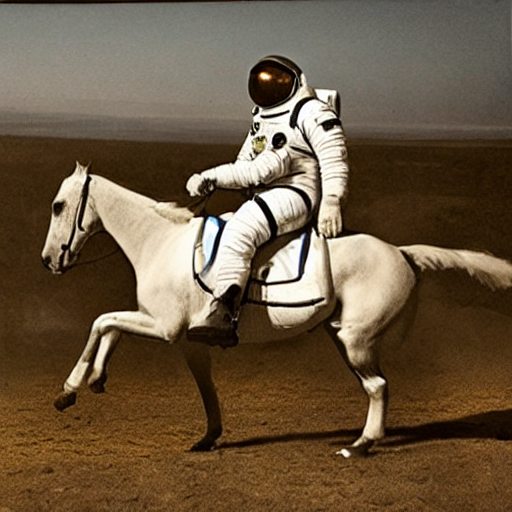

In [15]:
torch.manual_seed(42)
pipe(prompt).images[0]

In [16]:
def image_grid(imgs, rows, cols):
    w,h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    for i, img in enumerate(imgs): grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [17]:
num_rows,num_cols = 4,4
prompts = [prompt] * num_cols

In [19]:
images = concat(pipe(prompts, guidance_scale=g).images for g in [1.1,3,7,14])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
image_grid(images, rows=num_rows, cols=num_cols)

Jeremy then proceeds to demonstrate some additional features:

* Negative prompts

* Image to image diffusion. Fun stuff:
    - takign a sketch and making it a photo
    - taking an image (including one from the ai!) and changing it to an oil painting. 


* Fine tuning .  Using caption and image pairs to fine tune the model. See pokemon example in nbs notebook.

* Textual inversion: Teach a new token to the model and train its embeddings to tos visual representation. This only trains the text encodding (embedding) and so is fast.  I assume we will understand this better later?

* Dreambooth - Fine tunes the whole model to recoginze some rarely used token to bring that tken closer to a small set of provided images.  (They use this to make Paul Signac style portraits of Jeremy Howard in the notebook)

### How stable diffusion works.

See jeremy's notes here: [notes](https://forums.fast.ai/uploads/short-url/dI0cWOaQQEHFYPKVyM9BkSWY4rQ.pdf)